In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
GeoData = pd.read_csv('file1.csv', ',')
GeoData.describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,41.663934,-87.307773,192.319649,39.329404,63.294246,10.458831
std,0.083421,0.254616,19.384816,18.335309,29.507759,6.429008
min,41.592181,-87.638856,171.000000,0.000000,0.000000,5.000000
25%,41.604792,-87.530962,182.000000,28.000000,45.000000,10.000000
50%,41.616590,-87.323511,185.000000,40.500000,65.200000,10.000000
75%,41.710130,-87.133026,191.000000,48.175000,77.475000,10.000000
max,41.877575,-86.754688,266.000000,100.500000,161.700000,98.216204


In [3]:
print(GeoData['speedkmh'].max())
print(GeoData['speedkmh'].min())

161.7
0.0


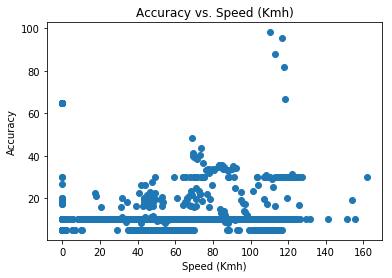

In [4]:
plt.scatter( GeoData['speedkmh'], GeoData['accuracy']);
plt.ylabel('Accuracy');
plt.xlabel('Speed (Kmh)');
plt.title('Accuracy vs. Speed (Kmh)');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


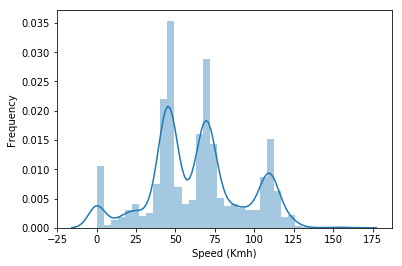

In [5]:
ax = sns.distplot(GeoData['speedkmh']);
ax.set(xlabel='Speed (Kmh)', ylabel='Frequency');

### Outlier Detection Discussion: Speed Kmh
Lets look at the information we have above: We have the summary statistics as well as a comparison between speed and accuracy. The summary statistics show that the `Speed (Kmh)` data has a relatively large standard deviation at 29.507, which is the largest of all the sets of data. This is represented in the histogram of`Speed (Kmh)` where we see a trimodal graph. Logically this makes sense as with any car drive there are different speeds that one maintains, such as city and highway speed. The graph that gives the most reason to not look at speed for outlier detection is the graph comparing `Accuracy` and `Speed (Kmh)` ideally outlier detection discovers errors in our data. The measurement of `Accuracy` does this and when graphed with speed we see that `Accuracy` only becomes dangerously high at higher speed and only a few times at a speed of 0. To conclude, it does not seem as if speed is an ideal variable to base our Outlier detecion off of.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[(0, 100)]

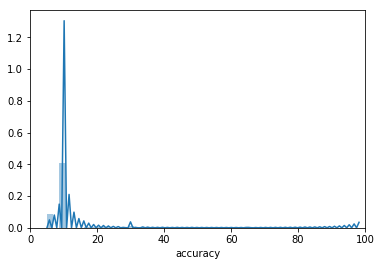

In [6]:

ax1 = sns.distplot(GeoData['accuracy'])
ax1.set(xlim = (0,100))

### Outlier Detection Discussion: Accuracy
As foreshadowed in our last discussion we see that `Accuracy` itself is a measurement of the validity of our data. This point is reassured by the histogram and summary statistics of `Accuracy`. The mean is 10.46 and the standard deviation is 6.43 this would mean that even as much as three standard deviations would not exceed 30, a number that does not represent half of the entire range of possible values. What this means is that `Accuracy` is both logically the best choice for outlier detection but also is the statistical choice.

In [7]:
### For outlier detection I decided to remove values that were two standard deviations to the mean, this was mostly inspired by the extremely narrow accuracy histogram
MuSpeed = GeoData['accuracy'].mean()
OutlierMark = 2 * GeoData['accuracy'].std()
CleanGeoData = GeoData.loc[(GeoData['accuracy'] > (MuSpeed - OutlierMark)) \
                                 & (GeoData['accuracy'] < (MuSpeed + OutlierMark))]

In [8]:
CleanGeoData.describe()
###Compare with prior

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000
mean,41.664843,-87.313425,191.561564,38.750457,62.362404,9.403229
std,0.083399,0.251500,17.859321,17.903881,28.813276,2.499493
min,41.592379,-87.638186,171.000000,0.000000,0.000000,5.000000
25%,41.604842,-87.532677,182.000000,27.800000,44.800000,10.000000
50%,41.616239,-87.324962,185.000000,39.600000,63.700000,10.000000
75%,41.711694,-87.138243,191.000000,46.700000,75.100000,10.000000
max,41.872075,-86.754688,266.000000,96.500000,155.300000,23.152697


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


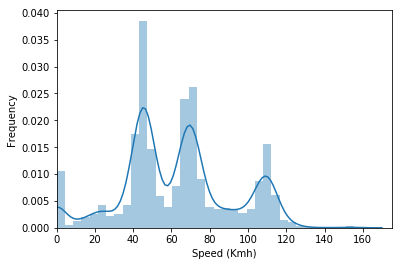

In [9]:
ax = sns.distplot(CleanGeoData['speedkmh']);
ax.set(xlabel='Speed (Kmh)', ylabel='Frequency', xlim = (0,175));

### Compare the differences of the above graph with that of the one further above.

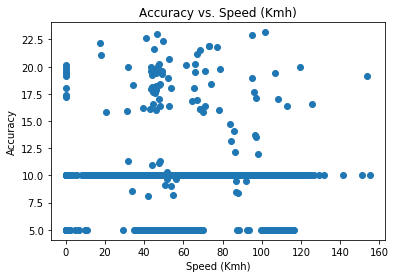

In [11]:
plt.scatter( CleanGeoData['speedkmh'], CleanGeoData['accuracy']);
plt.ylabel('Accuracy');
plt.xlabel('Speed (Kmh)');
plt.title('Accuracy vs. Speed (Kmh)');

### Compare the differences of the above graph with that of the one further above

In [12]:
CleanGeoData.loc[CleanGeoData['accuracy'] == 10].describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,2169.000000,2169.000000,2169.000000,2169.000000,2169.000000,2169.0
mean,41.670269,-87.324261,192.547257,39.531397,63.619364,10.0
std,0.086020,0.262483,18.922514,17.813454,28.667566,0.0
min,41.592379,-87.638186,171.000000,0.000000,0.000000,10.0
25%,41.604724,-87.540583,182.000000,27.800000,44.700000,10.0
50%,41.619394,-87.378712,185.000000,41.400000,66.600000,10.0
75%,41.717789,-87.082345,193.000000,47.800000,77.000000,10.0
max,41.872075,-86.755283,266.000000,96.500000,155.300000,10.0


In [13]:
CleanGeoData.loc[CleanGeoData['accuracy'] == 5].describe()

,latitude,longitude,altitude,speedmph,speedkmh,accuracy
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.0
mean,41.638673,-87.253372,186.856223,35.687339,57.431760,5.0
std,0.063612,0.181564,7.725863,17.845956,28.721005,0.0
min,41.596420,-87.635442,177.000000,0.000000,0.000000,5.0
25%,41.607517,-87.256538,183.000000,28.000000,45.000000,5.0
50%,41.613882,-87.220090,185.000000,29.200000,47.000000,5.0
75%,41.620652,-87.178734,188.000000,41.700000,67.075000,5.0
max,41.799261,-86.759924,258.000000,72.400000,116.500000,5.0


In [38]:
CleanGeoData['Coordinates'] = list(zip(CleanGeoData['longitude'], CleanGeoData['latitude']));
CleanGeoData['Coordinates'] = CleanGeoData['Coordinates'].apply(Point);
gdf = gpd.GeoDataFrame(CleanGeoData, geometry='Coordinates');
usa = gpd.read_file('cb_2017_us_state_500k.shp');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


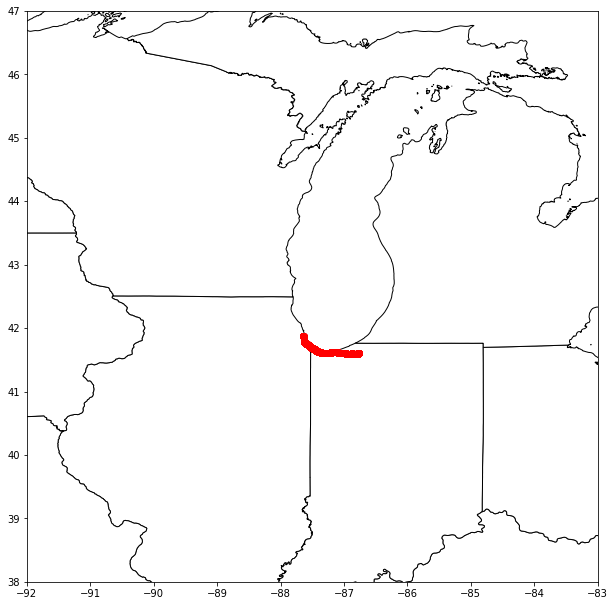

In [72]:
ax = usa.plot(
    color='white', edgecolor='black');

ax.set_xlim(-92, -83);
ax.set_ylim( 38, 47);

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red');

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

plt.show();

In [79]:
gdf.length()

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
2812    0.0
2813    0.0
2814    0.0
2815    0.0
2816    0.0
2817    0.0
2818    0.0
2819    0.0
2820    0.0
2821    0.0
2822    0.0
2823    0.0
2824    0.0
2825    0.0
2826    0.0
2827    0.0
2828    0.0
2829    0.0
2830    0.0
2831    0.0
2832    0.0
2833    0.0
2834    0.0
2835    0.0
2836    0.0
2837    0.0
2838    0.0
2839    0.0
2840    0.0
2841    0.0
Length: 2737, dtype: float64